# Feature Engineering in

###  Iris Flower Classification

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics


In [22]:
iris=pd.read_csv('iris.csv')
print('Shape of DataSet: ',iris.shape)
iris

Shape of DataSet:  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
print('Sum of NULL Values in each Feature: \n',iris.isnull().sum())
iris.groupby('Species').size()

Sum of NULL Values in each Feature: 
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [24]:
iris=iris.drop(['Id'],axis=1)

In [57]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
train,test=train_test_split(iris,test_size=0.4,random_state=42)

## Which feature(s) is/are best for classifying Iris Species? Let's find out

###  Univariate Analysis

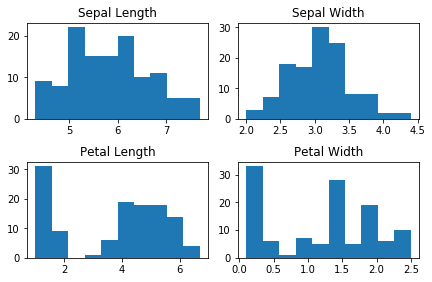

In [26]:
n_bins=10
fig,ax=plt.subplots(2,2)

ax[0,0].hist(train['SepalLengthCm'],bins=n_bins);
ax[0,0].set_title("Sepal Length")

ax[0,1].hist(train['SepalWidthCm'],bins=n_bins)
ax[0,1].set_title("Sepal Width");


ax[1,0].hist(train['PetalLengthCm'],bins=n_bins);
ax[1,0].set_title("Petal Length");


ax[1,1].hist(train['PetalWidthCm'],bins=n_bins);

ax[1,1].set_title("Petal Width");

fig.tight_layout(pad=1)

The bottom two charts (Petal Measurements) show a section of observations isolated from the rest

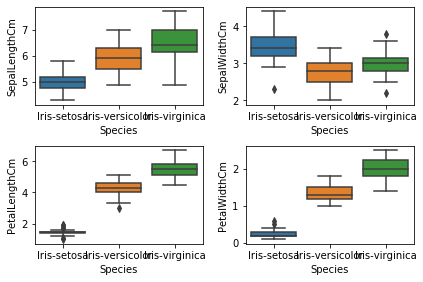

In [31]:
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = train,  order = cn, ax = axs[1,1]);


# add some spacing between subplots
fig.tight_layout(pad=1.0);

Again Petal Measurements are much smaller for Setosa than other, this same information lien in abouve Histograms also

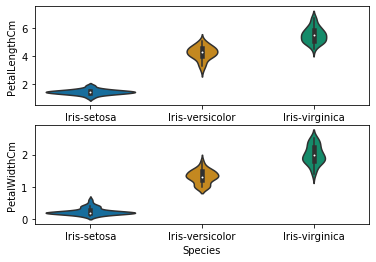

In [38]:
fig,axs=plt.subplots(2)

sns.violinplot(x="Species", 
               y="PetalLengthCm", 
               data=train, 
               size=5, 
               order = cn, 
               palette = 'colorblind',
              ax=axs[0]);
sns.violinplot(x="Species", 
               y="PetalWidthCm", 
               data=train, 
               size=5, 
               order = cn, 
               palette = 'colorblind',
              ax=axs[1]);

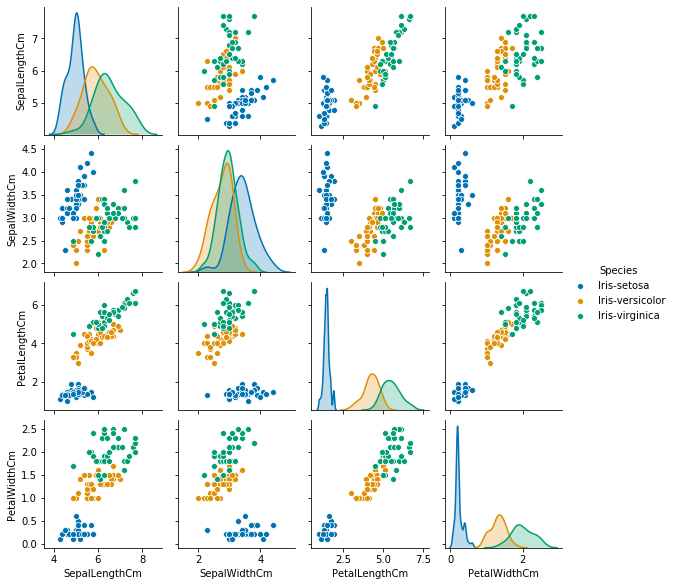

In [39]:
sns.pairplot(train,hue="Species",height=2,palette='colorblind')

Petal Measurements seperate the species better than Sepal Measurements

####  Now, quantitatively measure the features importance in classification

#### via  
### Correlation

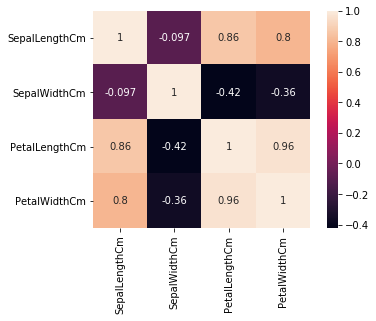

In [40]:
corrmat=train.corr()
sns.heatmap(corrmat,annot=True,square=True)

The Petal Measurements are highly correlated than Sepal Measurements since the latter gives negative correlation

#### Since sepal measurements are showing negative corellation with other measurements, that means sepal measurements are not useful to relate to another feature and a classification model based on Sepal measurements is a False model and not at all useful.

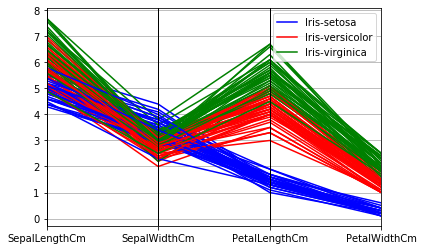

In [41]:
parallel_coordinates(train,'Species',color=['blue','red','green'])

Species in SepalLength , SepalWidth are overlapped a lot at same values  
But Petal Measurements are relatively so much better and the Species are seperated at Petal Measurements

###  With all the above evidence it is confirmed that we need to use Petal Length and Petal Width for accurate classification

###  Decision Tree Model 

In [51]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

####  Fitting and Predicting

####  Max_depth is given as 3

In [67]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)




print('The accuracy of the Decision Tree is',' {:.3f}'.format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is  0.983


###  Looking at Feature Importance 

In [68]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.07133757, 0.92866243])

####  Visualizing the classification Tree with plot_tree

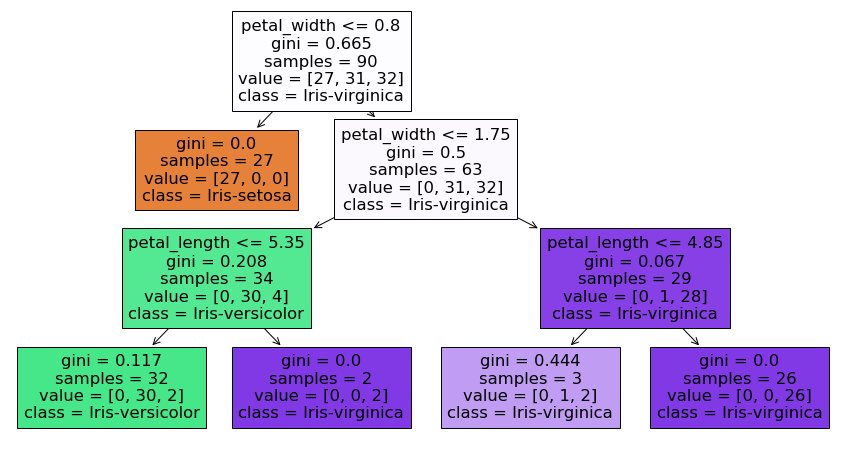

In [69]:
plt.figure(figsize=(15,8))

plot_tree(mod_dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

###  Verifying True labels vs Predicted Labels by looking at Confusion Matrix

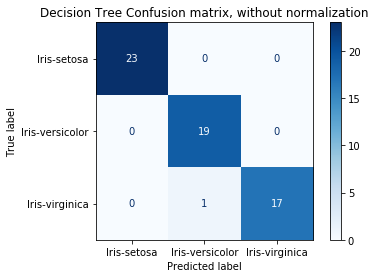

In [65]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');

###  Custom Prediction

In [66]:
custom_test=[[6,3,5,1.5],[7,8,2,3],[1,2,3,4]]


custom_prediction=mod_dt.predict(custom_test)

custom_prediction

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)